In [1]:
# Relax Challenge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Going to use takehome_user_engagement.csv to create the target data

target = pd.read_csv(r'C:\Users\Fernando Araiza\Downloads\1481069814_relax_challenge\relax_challenge\takehome_user_engagement.csv')

In [3]:
target.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
# Convert time_stamp to datetime also going to get rid of the time element
target.time_stamp = pd.to_datetime(target.time_stamp).dt.normalize()


In [5]:
target.head()

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [6]:
df = target.groupby('user_id', as_index=False)['time_stamp'].agg(list)

In [7]:
# create a list of the time_stamp column values.
stamps = df['time_stamp'].tolist()


In [8]:
adopted_user = []
for l in stamps:
    i = [*set(l)]
    i.sort(reverse = True)
    if len(i) < 3:
        adopted_user.append(0)
    elif len(i) == 3:
        delta = max(i) - min(i)
        if delta <= pd.Timedelta('7 days'):
            adopted_user.append(1)
        else:
            adopted_user.append(0)
    else:
        sub_list = []
        for x in range(len(i)-2):
            a1 = i[x] - i[x+1]
            a2 = i[x+1] - i[x+2]
            if a1 + a2 <= pd.Timedelta('7 days'):
                sub_list.append(1)
                continue
            else:
                sub_list.append(0)
        if 1 in sub_list:
            adopted_user.append(1)
        else:
            adopted_user.append(0)
            
            
                
        
            
        


In [9]:
count_0 = adopted_user.count(0)
count_1 = adopted_user.count(1)

print(f'{count_0}, {count_1}')

7167, 1656


In [10]:
target.drop(['visited'], axis = 1,  inplace = True)

In [11]:
target

,time_stamp,user_id
0,2014-04-22,1
1,2013-11-15,2
2,2013-11-29,2
3,2013-12-09,2
4,2013-12-25,2
...,...,...
207912,2013-09-06,11996
207913,2013-01-15,11997
207914,2014-04-27,11998
207915,2012-06-02,11999


In [12]:
df['y'] = adopted_user

In [13]:
df

,user_id,time_stamp,y
0,1,[2014-04-22 00:00:00],0
1,2,"[2013-11-15 00:00:00, 2013-11-29 00:00:00, 201...",1
2,3,[2013-03-19 00:00:00],0
3,4,[2013-05-22 00:00:00],0
4,5,[2013-01-22 00:00:00],0
...,...,...,...
8818,11996,[2013-09-06 00:00:00],0
8819,11997,[2013-01-15 00:00:00],0
8820,11998,[2014-04-27 00:00:00],0
8821,11999,[2012-06-02 00:00:00],0


In [14]:
df.drop('time_stamp', axis = 1, inplace = True)

In [15]:
df

,user_id,y
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
8818,11996,0
8819,11997,0
8820,11998,0
8821,11999,0


In [16]:
print('Only 18.7% of users are considered "adopted users"')

Only 18.7% of users are considered "adopted users"


In [17]:
# read the takehome_users csv
home = pd.read_csv(r'C:\Users\Fernando Araiza\Downloads\1481069814_relax_challenge\relax_challenge\takehome_users.csv',  encoding='latin-1')

In [18]:
home.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [19]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [20]:
# change creation_time to datetime
home.creation_time = pd.to_datetime(home.creation_time)

In [21]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [22]:
# convert last_session_creation_time to datetime
home.last_session_creation_time = pd.to_datetime(home.last_session_creation_time, unit = 's', errors = 'coerce')

In [23]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [24]:
# Look into nulls.
# For last_session... I will use the same information as creation_time.
home.last_session_creation_time = home.last_session_creation_time.fillna(home.creation_time)




In [25]:
#  invited_by_user_id I will convert to a boolean column. 1 if they were invited and 0 if they weren't
# Change null to 0
home.invited_by_user_id = home.invited_by_user_id.fillna(0)
# Change all values not 0 to 1.
home.invited_by_user_id = np.where(home.invited_by_user_id >=1, 1,0)

In [26]:
home.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1


In [27]:
# rename object_id to user_id
home

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,1
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0


In [28]:
# merge both dataframe and make a new dataframe named data
data = pd.merge(left = home, right= df, left_on = 'object_id', right_on = 'user_id'  )

In [29]:
data.set_index('object_id', inplace = True)

In [30]:
data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,y
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,2,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1,3,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1,4,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1,5,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               8823 non-null   datetime64[ns]
 1   name                        8823 non-null   object        
 2   email                       8823 non-null   object        
 3   creation_source             8823 non-null   object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    8823 non-null   int64         
 6   enabled_for_marketing_drip  8823 non-null   int64         
 7   org_id                      8823 non-null   int64         
 8   invited_by_user_id          8823 non-null   int32         
 9   user_id                     8823 non-null   int64         
 10  y                           8823 non-null   int64         
dtypes: datetime64[ns](2), int32(1), int64(5), object(3)
mem

In [32]:
data.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,y
count,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,0.252295,0.151989,142.572254,0.541312,6019.821716,0.187691
std,0.434354,0.359031,124.176422,0.498319,3464.251001,0.390488
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,3017.500000,0.000000
50%,0.000000,0.000000,109.000000,1.000000,6034.000000,0.000000
75%,1.000000,0.000000,239.000000,1.000000,9029.500000,0.000000
max,1.000000,1.000000,416.000000,1.000000,12000.000000,1.000000


In [33]:
# No need for name and email
dropped = ['name', 'email']

data.drop(dropped, axis = 1, inplace = True)

In [34]:
# Create dummy columns for 'creation_source'

creation = pd.get_dummies(data.creation_source, prefix = 'creation')

In [35]:
data = pd.concat([data, creation], axis = 1)

In [36]:
# droop creation_source
data.drop('creation_source', axis = 1, inplace = True)

In [37]:
y = data.y

In [38]:
data.drop('y', axis = 1, inplace = True)

In [39]:
data.creation_time = pd.to_numeric(data.creation_time)

In [40]:
data.last_session_creation_time = pd.to_numeric(data.last_session_creation_time)

In [41]:
X =  data.copy()

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   creation_time                8823 non-null   int64
 1   last_session_creation_time   8823 non-null   int64
 2   opted_in_to_mailing_list     8823 non-null   int64
 3   enabled_for_marketing_drip   8823 non-null   int64
 4   org_id                       8823 non-null   int64
 5   invited_by_user_id           8823 non-null   int32
 6   user_id                      8823 non-null   int64
 7   creation_GUEST_INVITE        8823 non-null   uint8
 8   creation_ORG_INVITE          8823 non-null   uint8
 9   creation_PERSONAL_PROJECTS   8823 non-null   uint8
 10  creation_SIGNUP              8823 non-null   uint8
 11  creation_SIGNUP_GOOGLE_AUTH  8823 non-null   uint8
dtypes: int32(1), int64(6), uint8(5)
memory usage: 560.1 KB


In [43]:
def accuracy_score(y_test, y_pred):
    from sklearn.metrics import accuracy_score
    print(f'Model accuracy score: {accuracy_score(y_test, y_pred)}')


In [44]:
def confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f' Confusion Matrix results are:')
    print(cm)
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    print(f'Confusion matrix shows {tp} True positives and {tn} True negatives for a total of {tp+tn} correct predictions.')
    print(f'Confusion matrix shows {fp} False postives and {fn} False negatives for a total of {fp+fn} incorrect predictions.')
          

In [45]:
def classification_report(y_test, y_pred):
    from sklearn.metrics import classification_report
    cr = classification_report(y_test, y_pred)
    print(cr)

In [46]:
def roc_curve(y_test, y_pred, test):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    algorithm = test
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title(f'ROC curve for {algorithm}')

    plt.xlabel('False Positive Rate (1 - Specificity)')

    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.show()

In [47]:
def roc_auc(y_test, y_pred):
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f' ROC_AUC score is:')
    print(roc_auc)
    

In [48]:
def scoring(y_test, y_pred, test):
    accuracy_score(y_test, y_pred)
    confusion_matrix(y_test, y_pred)
    classification_report(y_test, y_pred)
    roc_curve(y_test, y_pred, test)
    roc_auc(y_test, y_pred)

In [49]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(X.values)

In [50]:
scaled_df = pd.DataFrame(scaled_data, index = X.index, columns = X.columns)

In [51]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   creation_time                8823 non-null   float64
 1   last_session_creation_time   8823 non-null   float64
 2   opted_in_to_mailing_list     8823 non-null   float64
 3   enabled_for_marketing_drip   8823 non-null   float64
 4   org_id                       8823 non-null   float64
 5   invited_by_user_id           8823 non-null   float64
 6   user_id                      8823 non-null   float64
 7   creation_GUEST_INVITE        8823 non-null   float64
 8   creation_ORG_INVITE          8823 non-null   float64
 9   creation_PERSONAL_PROJECTS   8823 non-null   float64
 10  creation_SIGNUP              8823 non-null   float64
 11  creation_SIGNUP_GOOGLE_AUTH  8823 non-null   float64
dtypes: float64(12)
memory usage: 896.1 KB


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = .2, random_state = 7, stratify = y)

In [56]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_bnb_pred = bnb_model.predict(X_test) 

Model accuracy score: 0.8130311614730878
 Confusion Matrix results are:
[[1434    0]
 [ 330    1]]
Confusion matrix shows 1434 True positives and 1 True negatives for a total of 1435 correct predictions.
Confusion matrix shows 0 False postives and 330 False negatives for a total of 330 incorrect predictions.
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1434
           1       1.00      0.00      0.01       331

    accuracy                           0.81      1765
   macro avg       0.91      0.50      0.45      1765
weighted avg       0.85      0.81      0.73      1765



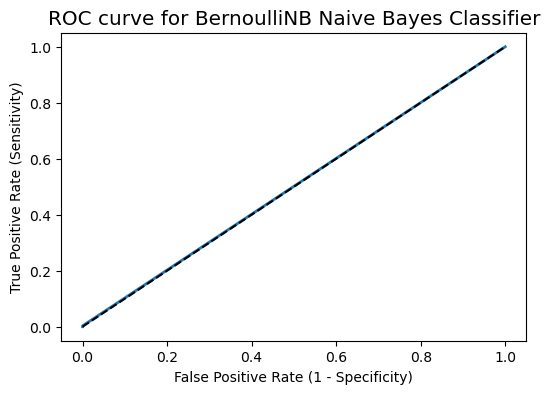

 ROC_AUC score is:
0.5015105740181269


In [57]:
scoring(y_test, y_bnb_pred, 'BernoulliNB Naive Bayes Classifier')

In [58]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(solver = 'liblinear', random_state = 7)
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)

Model accuracy score: 0.9580736543909348
 Confusion Matrix results are:
[[1419   15]
 [  59  272]]
Confusion matrix shows 1419 True positives and 272 True negatives for a total of 1691 correct predictions.
Confusion matrix shows 15 False postives and 59 False negatives for a total of 74 incorrect predictions.
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1434
           1       0.95      0.82      0.88       331

    accuracy                           0.96      1765
   macro avg       0.95      0.91      0.93      1765
weighted avg       0.96      0.96      0.96      1765



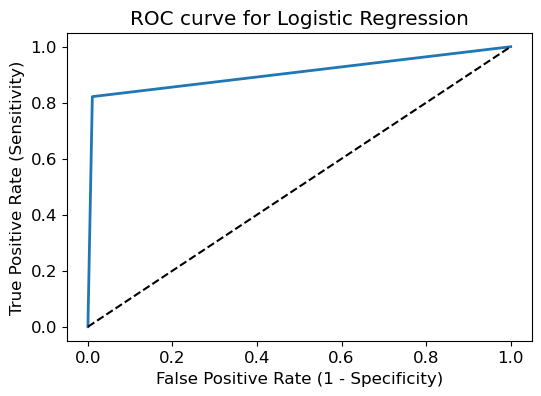

 ROC_AUC score is:
0.9056460074075011


In [59]:
scoring(y_test, lg_pred, 'Logistic Regression')

In [60]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_y_pred = dtc_model.predict(X_test)


Model accuracy score: 0.939943342776204
 Confusion Matrix results are:
[[1384   50]
 [  56  275]]
Confusion matrix shows 1384 True positives and 275 True negatives for a total of 1659 correct predictions.
Confusion matrix shows 50 False postives and 56 False negatives for a total of 106 incorrect predictions.
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1434
           1       0.85      0.83      0.84       331

    accuracy                           0.94      1765
   macro avg       0.90      0.90      0.90      1765
weighted avg       0.94      0.94      0.94      1765



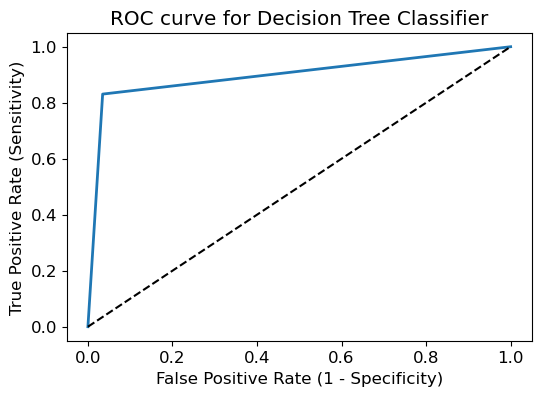

 ROC_AUC score is:
0.897974103241519


In [61]:
scoring(y_test, dtc_y_pred, 'Decision Tree Classifier')

In [62]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rcf_model = RandomForestClassifier()
rcf_model.fit(X_train, y_train )
y_rcf_pred = rcf_model.predict(X_test)

Model accuracy score: 0.9484419263456091
 Confusion Matrix results are:
[[1421   13]
 [  78  253]]
Confusion matrix shows 1421 True positives and 253 True negatives for a total of 1674 correct predictions.
Confusion matrix shows 13 False postives and 78 False negatives for a total of 91 incorrect predictions.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1434
           1       0.95      0.76      0.85       331

    accuracy                           0.95      1765
   macro avg       0.95      0.88      0.91      1765
weighted avg       0.95      0.95      0.95      1765



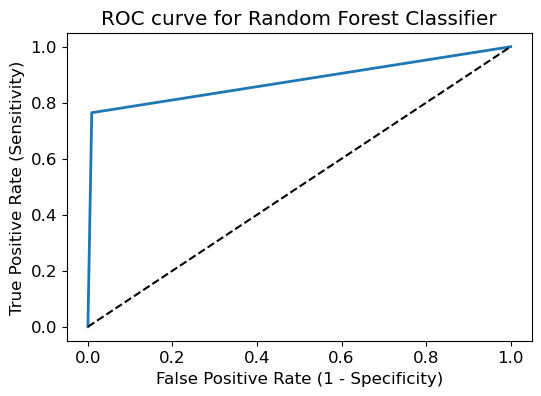

 ROC_AUC score is:
0.8776424511328251


In [63]:
scoring(y_test, y_rcf_pred, 'Random Forest Classifier')

In [64]:
# K neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model accuracy score: 0.9206798866855525
 Confusion Matrix results are:
[[1426    8]
 [ 132  199]]
Confusion matrix shows 1426 True positives and 199 True negatives for a total of 1625 correct predictions.
Confusion matrix shows 8 False postives and 132 False negatives for a total of 140 incorrect predictions.
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1434
           1       0.96      0.60      0.74       331

    accuracy                           0.92      1765
   macro avg       0.94      0.80      0.85      1765
weighted avg       0.92      0.92      0.91      1765



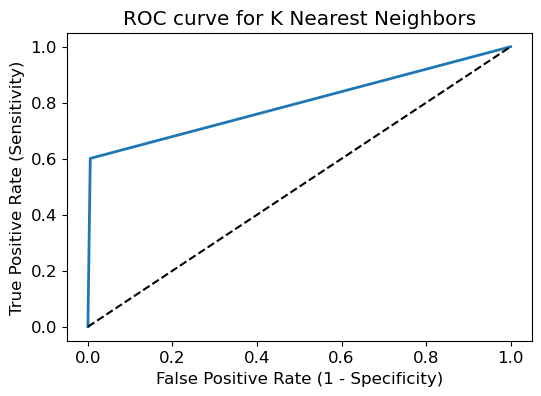

 ROC_AUC score is:
0.7978148293283107


In [65]:
scoring(y_test, y_knn_pred, 'K Nearest Neighbors')

In [66]:
# Hypertuning the best performing models, Logistic Regression, Random Forrest and Decision Tree Classifier.
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

lg = LogisticRegression()
lg.fit(X_train, y_train)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [67]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.963958 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [68]:
lg_grid = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
lg_grid.fit(X_train, y_train)
y_lg_grid_pred = lg_grid.predict(X_test)

Model accuracy score: 0.9609065155807366
 Confusion Matrix results are:
[[1412   22]
 [  47  284]]
Confusion matrix shows 1412 True positives and 284 True negatives for a total of 1696 correct predictions.
Confusion matrix shows 22 False postives and 47 False negatives for a total of 69 incorrect predictions.
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1434
           1       0.93      0.86      0.89       331

    accuracy                           0.96      1765
   macro avg       0.95      0.92      0.93      1765
weighted avg       0.96      0.96      0.96      1765



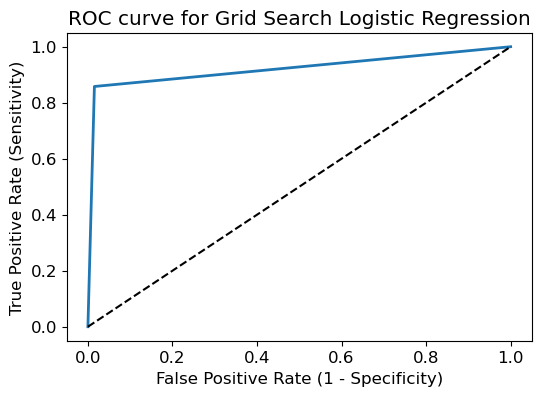

 ROC_AUC score is:
0.9213321703809512


In [69]:
scoring(y_test, y_lg_grid_pred, 'Grid Search Logistic Regression')

In [70]:
# Random Forrest Hyper tunning
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [73]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
rf_grid.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [74]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))
means = rf_grid.cv_results_['mean_test_score']
stds = rf_grid.cv_results_['std_test_score']
params = rf_grid.cv_results_['params']

Best: 0.944600 using {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}


In [78]:
rf_tune = RandomForestClassifier(max_depth = 9, max_features = 'auto', max_leaf_nodes = 9, n_estimators = 25)
rf_tune.fit(X_train, y_train)
y_rf_tune = rf_tune.predict(X_test)

Model accuracy score: 0.9354107648725213
 Confusion Matrix results are:
[[1427    7]
 [ 107  224]]
Confusion matrix shows 1427 True positives and 224 True negatives for a total of 1651 correct predictions.
Confusion matrix shows 7 False postives and 107 False negatives for a total of 114 incorrect predictions.
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1434
           1       0.97      0.68      0.80       331

    accuracy                           0.94      1765
   macro avg       0.95      0.84      0.88      1765
weighted avg       0.94      0.94      0.93      1765



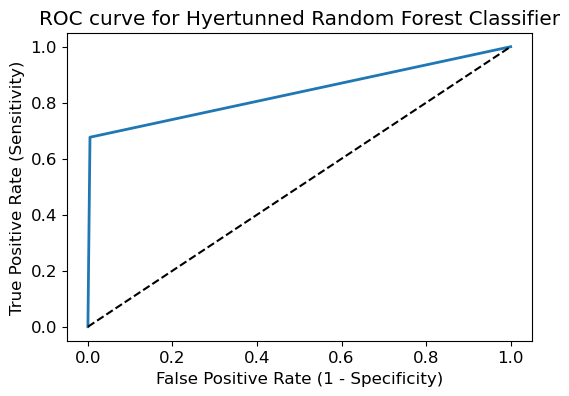

 ROC_AUC score is:
0.8359278548163505


In [79]:
scoring(y_test, y_rf_tune, 'Hyertunned Random Forest Classifier')

In [80]:
# Decision Tree Hypertuning
params_dt = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [82]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params_dt)
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [83]:
print("Best: %f using %s" % (dt_grid.best_score_, dt_grid.best_params_))
means = dt_grid.cv_results_['mean_test_score']
stds = dt_grid.cv_results_['std_test_score']
params = dt_grid.cv_results_['params']

Best: 0.959053 using {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}


In [84]:
dt_tune = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, min_samples_leaf = 10)
dt_tune.fit(X_train, y_train)
y_dt_tune = dt_tune.predict(X_test)

Model accuracy score: 0.9569405099150141
 Confusion Matrix results are:
[[1408   26]
 [  50  281]]
Confusion matrix shows 1408 True positives and 281 True negatives for a total of 1689 correct predictions.
Confusion matrix shows 26 False postives and 50 False negatives for a total of 76 incorrect predictions.
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1434
           1       0.92      0.85      0.88       331

    accuracy                           0.96      1765
   macro avg       0.94      0.92      0.93      1765
weighted avg       0.96      0.96      0.96      1765



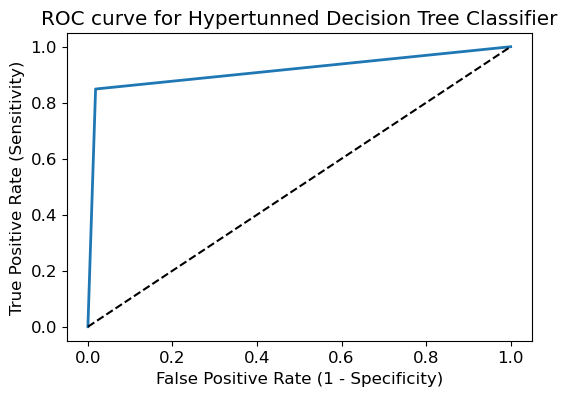

 ROC_AUC score is:
0.9154057481871005


In [85]:
scoring(y_test, y_dt_tune, 'Hypertunned Decision Tree Classifier')

<AxesSubplot:ylabel='Feature'>

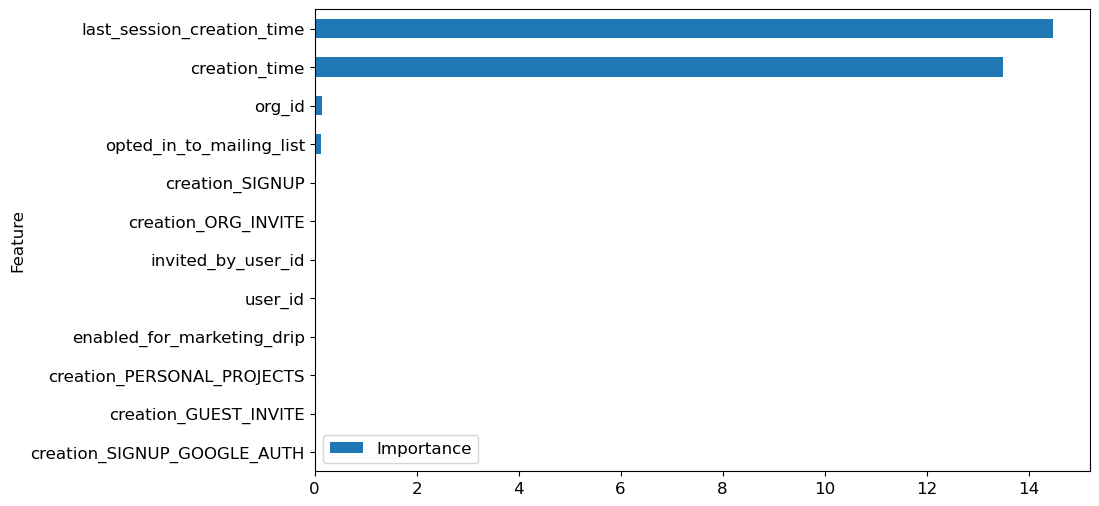

In [88]:
# Logistic Regression scored best after hypertuning, investigate feature importance
coefficients = lg_grid.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))